In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np

# [ 과제1 ] 서울시 지하철 역별 이용객수
# 1. 역별 평균 이용객 수
# 2. 역별 이용객 수의 표준편차
# 3. 가장 많은 이용객이 있는 역의 이용객 수
# 4. 가장 적은 이용객이 있는 역의 이용객 수
# 5. 가장 많은 이용객이 있는 역의 이름
# 6. 가장 적은 이용객이 있는 역의 이름
# 7. 이용객 수의 분포를 히스토그램으로 시각화
# -------------------------------------------

In [4]:
# 0. 파일 준비
pd.set_option('display.max_columns', None)  # 인덱스 전체 출력
pd.set_option('display.precision', 0)  # 인덱스 전체 출력
file = pd.read_csv('DATA/서울교통공사_역별 일별 시간대별 승하차인원 정보.csv', encoding='utf-8')
file

,연번,수송일자,호선,역번호,역명,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,12-13시간대,13-14시간대,14-15시간대,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후
0,1,2023-01-01,1호선,150,서울역,승차,215,145,231,594,923,1383,2024,2540,2394,1787,2655,2509,2696,2549,2462,2177,2190,1808,734,7
1,2,2023-01-01,1호선,150,서울역,하차,154,636,595,939,1306,1324,1471,2036,1994,2246,2282,2295,2526,1930,1897,1487,991,609,280,46
2,3,2023-01-01,1호선,151,시청,승차,48,73,106,194,239,295,493,622,557,717,843,895,959,985,670,630,515,330,146,0
3,4,2023-01-01,1호선,151,시청,하차,64,247,293,463,522,569,598,797,804,728,602,575,533,456,285,267,246,154,79,18
4,5,2023-01-01,1호선,152,종각,승차,407,235,158,201,188,284,470,708,738,1021,1145,1402,1223,1272,911,913,906,602,232,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148790,148791,2023-09-30,8호선,2826,수진,하차,8,0,8,40,30,38,66,93,93,110,195,165,136,171,190,178,132,153,162,133
148791,148792,2023-09-30,8호선,2827,모란,승차,39,0,39,34,54,87,122,132,170,208,200,189,205,233,219,169,103,137,117,105
148792,148793,2023-09-30,8호선,2827,모란,하차,9,0,9,45,46,72,58,104,133,128,132,156,164,165,216,215,176,121,113,113
148793,148794,2023-09-30,8호선,2828,남위례,승차,20,0,20,54,54,98,153,167,245,224,184,211,201,214,182,189,112,131,134,105


In [5]:
# 0-1. 자료 확인
# print(file.dtypes)  # int 자료형 확인
# print(file.sort_values(['수송일자','역명']))  # 일자별 호선별 2행씩 존재

# 0-2. 전처리: 합계 구하기
file['합계'] = file.iloc[:, 6:].sum(axis=1)    # 합산 후 새 컬럼에 추가
file_refine_1 = file.loc[:, ['수송일자', '역명', '합계']]
file_refine_final = file_refine_1.groupby(['수송일자', '역명'], as_index=False).sum()
file_refine_final.set_index('수송일자')

,역명,합계
수송일자,,
2023-01-01,가락시장,11728
2023-01-01,가산디지털단지,17304
2023-01-01,강남,49515
2023-01-01,강남구청,6674
2023-01-01,강동,14672
...,...,...
2023-09-30,홍제,17211
2023-09-30,화곡,23059
2023-09-30,화랑대(서울여대입구),8040


In [6]:
# 1. 평균 이용객 수 : 하루 이용객 기준으로 전체 기간의 평균 산정
#   - 기간 : 2023/01/01 ~ 2023/09/30
station_mean = file_refine_final.groupby('역명')['합계'].mean().reset_index()
# station_mean.dtypes
pd.DataFrame(station_mean.values, columns = ['역명', '평균 이용객 수'])

,역명,평균 이용객 수
0,가락시장,32027
1,가산디지털단지,75201
2,강남,14699
3,강남구청,31428
4,강동,33685
...,...,...
240,홍제,33453
241,화곡,52311
242,화랑대(서울여대입구),19915
243,회현(남대문시장),49852


In [7]:
# 1-2. 전체 평균 이용자수 (일자별)
date_mean = file_refine_final.groupby('수송일자')['합계'].mean().reset_index()
pd.DataFrame(date_mean.values, columns = ['수송일자', '평균 이용객 수'])

,수송일자,평균 이용객 수
0,2023-01-01,15907
1,2023-01-02,35352
2,2023-01-03,37178
3,2023-01-04,37917
4,2023-01-05,3836
...,...,...
268,2023-09-26,41401
269,2023-09-27,40178
270,2023-09-28,16687
271,2023-09-29,13613


In [8]:
# 2. 역별 이용객 수의 표준편차
station_std = file_refine_final.groupby('역명')['합계'].std().dropna().reset_index()  # 표준편차: .std
pd.DataFrame(station_std.values, columns = ['역명', '표준편차'])

,역명,표준편차
0,가락시장,9016
1,가산디지털단지,35258
2,강남,43258
3,강남구청,11193
4,강동,8569
...,...,...
237,홍제,7609
238,화곡,131
239,화랑대(서울여대입구),6206
240,회현(남대문시장),14752


In [9]:
# 3. 가장 많은 이용객이 있는 역의 이용객 수
# 5. 가장 많은 이용객이 있는 역의 이름
station_sum = file_refine_final.groupby('역명')['합계'].sum()  # 합계: .sum, 최대값 : .max
station_max = station_sum[station_sum.values == station_sum.max()]  # 해당 값이 .max에 해당하는 행을 추출
station_max

역명
잠실(송파구청)    49384021
Name: 합계, dtype: int64

In [10]:
# 4. 가장 작은 이용객이 있는 역의 이용객 수
# 6. 가장 작은 이용객이 있는 역의 이름
station_min = station_sum[station_sum.values == station_sum[station_sum > 0].min()]  # .min에 해당하는 행을 추출, 0 값 제외
station_min

역명
남태령    669999
Name: 합계, dtype: int64

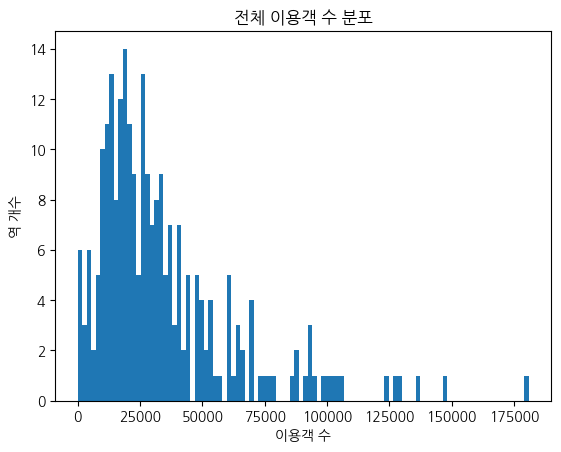

In [14]:
# 7. 이용객 수의 분포를 히스토그램으로 시각화
# - 역별 평규값을 이용
station_mean_hist = np.array(file_refine_final.groupby('역명')['합계'].mean())
plt.hist(station_mean_hist, bins = 100)
plt.title('전체 이용객 수 분포')
plt.xlabel('이용객 수')
plt.ylabel('역 개수')
plt.show()

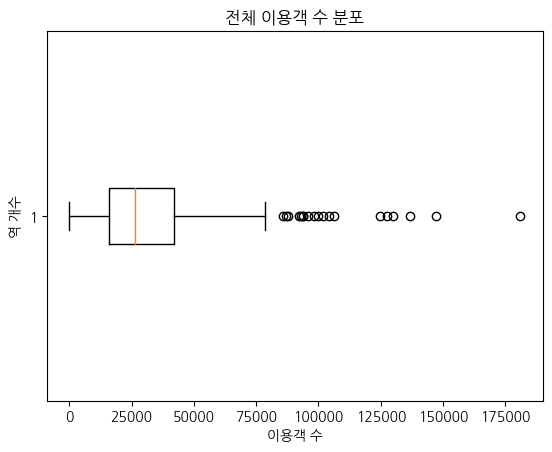

In [17]:
# boxplot 표현 : 2만5천명 구간이 가장 많다
plt.boxplot(station_mean_hist, vert=False)
plt.title('전체 이용객 수 분포')
plt.xlabel('이용객 수')
plt.ylabel('역 개수')
plt.show()